In [1]:
import pandas as pd

#local path of data from my computer - not all columns are included.
body = r"C:\Users\Suat\Documents\Programming\Data Science Project\data.csv"

df = pd.read_csv(body)
df.head()

,borough,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,longitude,street_name,status
0,BROOKLYN,2015-11-23T10:29:49.000,DOOR/WINDOW,2015-11-07T10:16:55.000,397 1 STREET,11215.0,40.672571,-73.979307,1 STREET,Closed
1,MANHATTAN,2016-01-31T11:50:51.000,DOOR/WINDOW,2015-11-07T18:50:53.000,3851 BROADWAY,10032.0,40.836272,-73.943274,BROADWAY,Closed
2,MANHATTAN,2015-11-20T09:11:31.000,DOOR/WINDOW,2015-11-07T23:09:57.000,3851 BROADWAY,10032.0,40.836272,-73.943274,BROADWAY,Closed
3,BROOKLYN,2015-11-16T12:25:46.000,DOOR/WINDOW,2015-11-07T14:05:52.000,1555 NOSTRAND AVENUE,11226.0,40.648298,-73.949293,NOSTRAND AVENUE,Closed
4,BRONX,2015-12-03T09:38:12.000,DOOR/WINDOW,2015-11-06T13:02:50.000,1808 MULFORD AVENUE,10461.0,40.847490,-73.835112,MULFORD AVENUE,Closed


## Question 4: 
Can a predictive model be built for future prediction of the possibility of Complaints of the type that you identified in response to Question 1?

In [2]:
import numpy as np
#after 2014 HEATING became HEAT/HOT WATER, so we have to combine
df['complaint_type'] = np.where(df['complaint_type']=='HEATING','HEAT/HOT WATER',df['complaint_type'])

In [3]:
df["complaint_type"].value_counts().head()

HEAT/HOT WATER          1960914
PLUMBING                 676178
GENERAL CONSTRUCTION     500863
UNSANITARY CONDITION     393855
PAINT - PLASTER          361258
Name: complaint_type, dtype: int64

In [4]:
#Have a quick look
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583182 entries, 0 to 5583181
Data columns (total 10 columns):
borough             object
closed_date         object
complaint_type      object
created_date        object
incident_address    object
incident_zip        float64
latitude            float64
longitude           float64
street_name         object
status              object
dtypes: float64(3), object(7)
memory usage: 426.0+ MB


Now, let's have only the complaint type that we are going to analyze.

In [5]:
df = df[df.complaint_type == "HEAT/HOT WATER"]

In [6]:
df["complaint_type"].value_counts()

HEAT/HOT WATER    1960914
Name: complaint_type, dtype: int64

Let's see yearly changes of the HEAT/HOT WATER problem occurence

In [7]:
df["created_date"].head()

13     2015-11-06T07:06:37.000
14     2015-11-06T06:43:48.000
165    2015-11-07T15:41:28.000
169    2015-11-06T17:57:24.000
170    2015-11-06T11:46:20.000
Name: created_date, dtype: object

In [8]:
#convert into datetime
df['created_date'] = pd.to_datetime(df['created_date'])

In [9]:
df["created_date"].head()

13    2015-11-06 07:06:37
14    2015-11-06 06:43:48
165   2015-11-07 15:41:28
169   2015-11-06 17:57:24
170   2015-11-06 11:46:20
Name: created_date, dtype: datetime64[ns]

In [10]:
#We also know that from previous problems that BRONX is the borough that has the most HEAT/HOT water problem
df = df[df.borough == "BRONX"]

In [11]:
#now let's see our graph
import datetime as dt
grp = df.groupby(df.created_date.dt.year)

In [12]:
grp.count()

,borough,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,longitude,street_name,status
created_date,,,,,,,,,,
2010,33,6,33,33,33,32,32,32,33,33
2011,35825,35630,35825,35825,35824,35740,35740,35740,35824,35825
2012,56852,56642,56852,56852,56852,56617,56617,56617,56852,56852
2013,67655,67171,67655,67655,67655,63873,63873,63873,67655,67655
2014,79844,79508,79844,79844,79844,79844,79844,79844,79844,79844
2015,71865,71800,71865,71865,71865,71864,71864,71864,71865,71865
2016,74201,74106,74201,74201,74201,74197,74197,74197,74201,74201
2017,68718,68548,68718,68718,68718,68713,68713,68713,68718,68718
2018,71454,71368,71454,71454,71454,69616,69616,69616,71454,71454


In [13]:
grp.count().index

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype='int64', name='created_date')

In [14]:
#let's see in a graph
import matplotlib.pyplot as plt

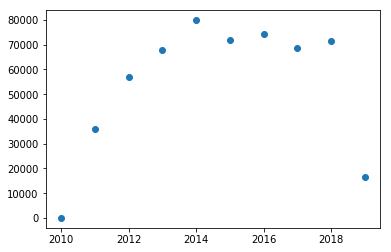

In [15]:
plt.scatter(grp.count().index ,grp.count().complaint_type)
plt.show()

Now, we should ignore 2010 and 2019 data because they are partial, not for all year.

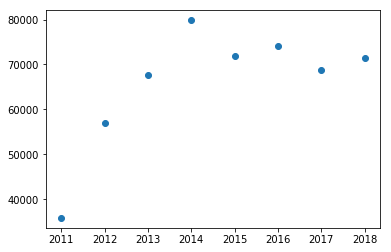

In [16]:
plt.scatter(grp.count().index[1:-1] ,grp.count().complaint_type[1:-1])
plt.show()

Let's build a non-linear regression for predicting future occurences.
This is an additional model. I want to make something just using the 311 dataset alone.

In [17]:
#Let's define X and Y
X = grp.count().index[1:-1]
y = grp.count().complaint_type[1:-1]

In [18]:
X = [X.tolist()]
X

[[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]]

In [19]:
X = np.asarray(X)

In [20]:
X = X.reshape(-1, 1)

In [21]:
from sklearn.linear_model import LinearRegression 
lin = LinearRegression()

In [22]:
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 
 
lin.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

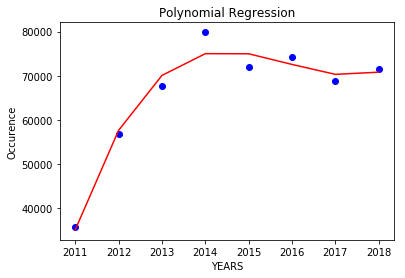

In [23]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin.predict(X_poly), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('YEARS') 
plt.ylabel('Occurence') 
  
plt.show()

In [24]:
#let's predict the 2019 value
lin.predict(poly.fit_transform([[2019]]))

array([76597.4453125])

We're going to see if it will be close to 76470 at te end of this year :)

## MORE ANALYSIS - MAKING A MODEL

Analysis based on yearly values is simple but can be useful. Now let's dive into more detailled analysis. I am going to recall dataframes from former questions where I merged two dataframes, 311 and bronx.

In [25]:
#local path of data from my computer - not all columns are included.
body2 = r"C:\Users\Suat\Documents\Programming\Data Science Project\last_df.csv"

last_df = pd.read_csv(body2)
last_df.head()

,Unnamed: 0,complaint_amount,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,...,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,HOT/HEAT WATER,complaint_range,Age
0,1,0.0,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,...,6.02,0,1931,1994,10454.0,232156.0,1006076.0,False,0,88
1,2,0.0,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,...,6.02,0,1931,0,10454.0,232036.0,1006187.0,False,0,88
2,3,2.0,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,...,6.02,0,1931,2001,10454.0,232033.0,1006299.0,True,1,88
3,4,13.0,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,...,6.02,1719,1920,2009,10454.0,232040.0,1006363.0,True,10,99
4,6,0.0,519 EAST 132 STREET,5316,100.0,0.61,5.0,6.5,34,8700,...,6.02,0,1931,0,10454.0,232055.0,1006046.0,False,0,88


Notes on dataset "last_df"

1. This dataset is merged dataset of 311 Servis Datas and PLUTO datas for BRONX
2. Merging process has been done based on Address
3. There is only HEAT/HOT WATER complaints and there are 3 cells for them.
4. complaint_amount column shows how many complaints has occured
5. HOT/HEAT WATER column if there is HEAT/HOT WATER problem occured in that Address or not. (yes should be HOT/HEAT WATER)
6. complaint_range column has 4 ranges for complaint_amount. 0, 1-10(1), 10-100(10) and >100(100)

## Important Notes:
I will not apply algorithms again for finding most important features. It was done in the Q3 Jupyter file, so feel free to check if you want to learn about this process.

So, I found following features are the most related with complaint amount.
1. NumFloors
2. ResArea
3. BuiltFar
4. BldgArea
5. Age
6. BldgDepth

I will make a model based on those 6 features (again, most related features)

So, how do we choose the model?
In the question, it asked us to make a model predicting the amount. So we should use regression algorithm. I choose to build a Regression Decision Tree. Also, I can use Classification Decision Tree if I want to find if the problem will occur or not. Remember, there is a column in my dataset (HOT/HEAT WATER) contains True/False for this.

In [26]:
#Let's see the percentage of occurence
last_df["HOT/HEAT WATER"].value_counts(True)

False    0.801511
True     0.198489
Name: HOT/HEAT WATER, dtype: float64

We clearly see that only 19.2% of the total called for the HEAT/HOT WATER problem.

In [27]:
#Let's quickly look if there is any NaN variables
last_df.isnull().sum()

Unnamed: 0          0
complaint_amount    0
Address             0
BldgArea            0
BldgDepth           0
BuiltFAR            0
CommFAR             0
FacilFAR            0
Lot                 0
LotArea             0
LotDepth            0
NumBldgs            0
NumFloors           0
OfficeArea          0
ResArea             0
ResidFAR            0
RetailArea          0
YearBuilt           0
YearAlter1          0
ZipCode             0
YCoord              0
XCoord              0
HOT/HEAT WATER      0
complaint_range     0
Age                 0
dtype: int64

Good, there is no null.

complaint amount is continuous variable describing how many calls have been received from same address. let's look at NumFloor definition from the PLUTO document: "In the tallest building on the tax lot, the number of full and partial stories starting from the ground floor.". So, basically, how many floors that this address has.

In [28]:
#Check the values of NumFloors
last_df["NumFloors"].unique()

array([ 1.  ,  2.  ,  5.  ,  3.  ,  4.  ,  7.  , 16.  ,  6.  , 17.  ,
       20.  , 12.  ,  0.  ,  8.  ,  1.5 , 13.  , 19.  , 22.  , 11.  ,
       14.  ,  9.  ,  1.75, 10.  , 25.  , 18.  ,  2.5 ,  3.5 , 21.  ,
        2.75, 23.  , 29.  , 15.  ,  5.5 ,  2.67,  3.75,  1.67, 44.  ,
       30.  , 31.  ,  2.25, 42.  , 28.  ,  0.5 ,  1.25, 24.  , 33.  ,
        1.33,  4.5 ])

In [29]:
#are there too many zeros?
last_df["NumFloors"].value_counts()

2.00     42104
3.00     15177
1.00      8869
2.50      5072
5.00      3232
6.00      2160
4.00      1694
1.50      1530
2.75      1163
1.75       715
1.67       341
7.00       230
0.00       176
8.00       154
9.00        77
3.50        61
12.00       48
14.00       41
10.00       41
11.00       39
13.00       37
20.00       25
16.00       24
2.67        20
3.75        18
19.00       13
21.00       12
18.00       11
15.00       11
2.25         9
22.00        7
25.00        6
30.00        5
17.00        5
33.00        2
28.00        2
23.00        2
44.00        1
29.00        1
4.50         1
1.33         1
0.50         1
31.00        1
42.00        1
24.00        1
1.25         1
5.50         1
Name: NumFloors, dtype: int64

In the dataset file, there is an explanation: "If the NUMBER OF FLOORS is zero and the NUMBER OF BUILDINGS is greater than zero, then NUMBER OF FLOORS is not available for the tax lot. If the NUMBER OF FLOORS is zero and the NUMBER OF BUILDINGS is zero, then NUMBER OF FLOORS is not applicable for the tax lot." Based on this, I've decided to drop zeros from the dataset

In [30]:
last_df_2 = last_df[last_df.NumFloors != 0]
last_df_2.head()

,Unnamed: 0,complaint_amount,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,...,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,HOT/HEAT WATER,complaint_range,Age
0,1,0.0,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,...,6.02,0,1931,1994,10454.0,232156.0,1006076.0,False,0,88
1,2,0.0,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,...,6.02,0,1931,0,10454.0,232036.0,1006187.0,False,0,88
2,3,2.0,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,...,6.02,0,1931,2001,10454.0,232033.0,1006299.0,True,1,88
3,4,13.0,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,...,6.02,1719,1920,2009,10454.0,232040.0,1006363.0,True,10,99
4,6,0.0,519 EAST 132 STREET,5316,100.0,0.61,5.0,6.5,34,8700,...,6.02,0,1931,0,10454.0,232055.0,1006046.0,False,0,88


One more note from the dataset about ResArea: "A RESIDENTIAL FLOOR AREA of zero can mean it is either not available or not applicable." Let's drop zeros from residental Area

In [31]:
last_df_2 = last_df_2[last_df_2.ResArea != 0]

Now, let's make a database which only contains the features that we've selected.

In [32]:
last_df_3 = last_df_2[["complaint_amount", "NumFloors", "ResArea", "BuiltFAR", "BldgArea", "Age", "BldgDepth"]]

In [33]:
last_df_3.head()

,complaint_amount,NumFloors,ResArea,BuiltFAR,BldgArea,Age,BldgDepth
2,2.0,5.0,12500,5.00,12500,88,85.0
3,13.0,5.0,6876,4.58,8595,99,70.0
16,0.0,4.0,6784,2.71,6784,99,75.0
19,92.0,5.0,9176,4.60,11500,94,96.0
25,0.0,16.0,1306230,6.39,1306230,63,48.0


Making train and test splits

In [34]:
features = last_df_3.columns.tolist()
response = 'complaint_amount'
features.remove(response)

X = last_df_3[features]
y = last_df_3[response]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
#80% train, 20% test size
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

Now we apply regression decision tree 

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
regressor = DecisionTreeRegressor(random_state = 32)

In [40]:
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=32, splitter='best')

In [41]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

In [42]:
#don't know if it is from test or train data
regressor.predict([[5.0, 12500, 5.0, 12500, 88, 85.0]])

array([2.])

correct

In [43]:
#don't know if it is from test or train data
regressor.predict([[5.0, 6876, 4.58, 8595, 99, 70.0]])

array([13.])

correct

In [44]:
regressor.predict([[4.0, 6784, 2.71, 6784, 99, 75.0]])

array([0.])

correct

In [45]:
X_test.loc[18171, :]

NumFloors        6.00
ResArea      76158.00
BuiltFAR         3.91
BldgArea     76158.00
Age             82.00
BldgDepth      108.00
Name: 18171, dtype: float64

In [46]:
y_test2 = y_test[y_test>100]

In [47]:
y_test2

43647     138.0
34742     188.0
19844     176.0
19008     116.0
8289      147.0
18171     506.0
29285    5758.0
19167     212.0
58302     352.0
67904     219.0
8075      197.0
2479      176.0
12394     130.0
58337     347.0
8784      155.0
34826     436.0
36403     146.0
10475     185.0
38899     102.0
10561     173.0
43472     104.0
3083      229.0
5386      137.0
18763     464.0
5592      107.0
21673     116.0
14662     213.0
19886     157.0
19954     238.0
21255     160.0
          ...  
19999     201.0
3500      282.0
18318     107.0
3419      175.0
18109     174.0
43653     177.0
13968     231.0
11885     436.0
19143     417.0
80013     630.0
20456    1560.0
49186     233.0
30148     137.0
29382     104.0
66241     169.0
11106     101.0
5051      113.0
10755     201.0
19634     147.0
21294     155.0
3503      343.0
9819      136.0
22913     304.0
42031     143.0
22168     167.0
5429      107.0
8777      114.0
29349     160.0
27764     119.0
53279     114.0
Name: complaint_amount, 

In [48]:
#from test data, result sholud be 0.
regressor.predict([[2.0, 1260, 0.82, 1732, 74, 35.0]])

array([0.])

In [49]:
#from test data, result sholud be 4.
regressor.predict([[3.00, 2868, 1.43, 2868, 24, 47.50]])

array([0.])

In [50]:
# from test data, should be 17
regressor.predict([["5.00","21500","4.30","21500","99","86.0"]])

array([62.])

In [51]:
#from test data, should be 69
regressor.predict([["6.00","70900","3.27","70900","93","58.83"]])

array([42.])

In [52]:
#should be 24
regressor.predict([["2.00","2100","0.88","2100","99","50.00"]])

array([0.])

In [53]:
#sholud be 12
regressor.predict([["3.00","2650","1.35","2650","59","50.00"]])

array([3.])

In [54]:
#sholud be 5758
regressor.predict([["6.00","61500.00","4.99","61500.00","88.00","87.00"]])

array([82.])

In [55]:
#sholud be 506
regressor.predict([["6.00","76158.00","3.91","76158.00","82.00","108.00"]])

array([3.])

# Conclusion Remarks
In this notebook, a predictive model is built with using Regression Decision Tree. 
This notebook will be updated with other algorithms.

In [57]:
predTree = regressor.predict(X_test)

In [58]:
print (predTree [0:5])

[0. 0. 0. 0. 0.]


In [59]:
print (y_test [0:5])

38413    0.0
60152    0.0
21762    0.0
39288    0.0
51034    0.0
Name: complaint_amount, dtype: float64


In [63]:
x_grid = np.arange(0, len(predTree), 1)

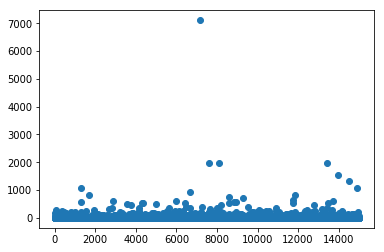

In [64]:
plt.scatter(x_grid, predTree, color = "blue")

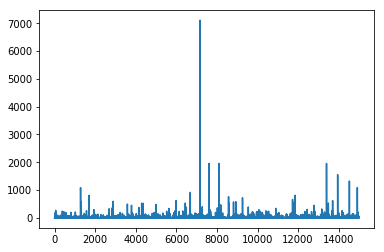

In [65]:
plt.plot(x_grid, regressor.predict(X_test))

In [66]:
y_grid = np.arange(len(y_test), 1)

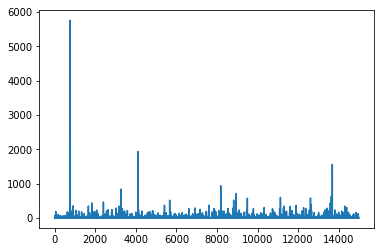

In [68]:
plt.plot(x_grid, y_test)

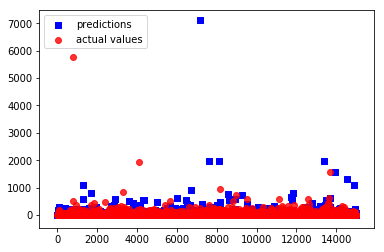

In [72]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_grid, predTree, c='b', marker="s", label='predictions')
ax1.scatter(x_grid, y_test, c='r', marker="o", alpha=0.8, label='actual values')
plt.legend(loc='upper left');
plt.show()

Outliers are problem because there's a lot of houses with small complaint amount. 
This model is good with approx. results with little number of complaints. 
Note to self: Remove outlier and build the model again.